## Assignment - 2

### Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import plotly
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

### Import Covid-19 Dataset

In [14]:
Covid19India = pd.read_csv('covid_19_india.csv')

In [15]:
Covid19India.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [16]:
Covid19India = Covid19India.drop(['ConfirmedIndianNational', 'ConfirmedForeignNational','Sno'], axis = 1)

In [17]:
Covid19India.head()

,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,6:00 PM,Kerala,0,0,1
1,2020-01-31,6:00 PM,Kerala,0,0,1
2,2020-02-01,6:00 PM,Kerala,0,0,2
3,2020-02-02,6:00 PM,Kerala,0,0,3
4,2020-02-03,6:00 PM,Kerala,0,0,3


### Data Cleaning

In [18]:
#Covid19India['State/UnionTerritory'].unique
Covid19India['Date'] = pd.to_datetime(Covid19India['Date'], format = '%Y-%m-%d')
dropIndex = Covid19India.loc[Covid19India['State/UnionTerritory'] == 'Cases being reassigned to states'].index
Covid19India.drop(dropIndex, inplace = True)
dropIndex = Covid19India.loc[Covid19India['State/UnionTerritory'] == 'Unassigned'].index
Covid19India.drop(dropIndex, inplace = True)

In [19]:
Covid19ToDate = Covid19India.sort_values(['Date', 'Confirmed'],ascending = False)
Covid19ToDate.columns = ['Date', 'Time', 'State', 'Cured', 'Deaths', 'Confirmed']


### Importing Statewise Vaccination Dataset

In [20]:
CovidVaccine = pd.read_csv('covid_vaccine_statewise.csv')
CovidVaccine.info()
CovidVaccine.rename(columns={'Updated On': 'Date',
                                            'Total Individuals Vaccinated': 'TotalVaccinated',
                                           'First Dose Administered':'FirstDose',
                                           'Second Dose Administered':'SecondDose',
                                           'Male(Individuals Vaccinated)':'Male',
                                           'Female(Individuals Vaccinated)':'Female',
                                           'Transgender(Individuals Vaccinated)':'Transgender',
                                           'Total Covaxin Administered':'TotalCovaxin',
                                           'Total CoviShield Administered':'TotalCoviShield'}, inplace=True)
CovidVaccine = CovidVaccine[CovidVaccine['TotalVaccinated'].notna()]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Updated On                           7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4    Sites                               7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10   Covaxin (Doses Administered)        7621 non-null   float64
 11  CoviShield (Doses Administered

In [21]:
CovidVaccine.head()
CovidVaccine.sort_values('Date',ascending = False)

,Date,State,Total Doses Administered,Sessions,Sites,FirstDose,SecondDose,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male,Female,Transgender,TotalVaccinated
2680,31/05/2021,Haryana,5889201.0,217971.0,860.0,4893257.0,995944.0,2644942.0,2247475.0,840.0,...,NaN,NaN,NaN,1369035.0,1788023.0,1732390.0,NaN,NaN,NaN,4893257.0
4588,31/05/2021,Maharashtra,22586620.0,976894.0,4069.0,18016877.0,4569743.0,9651880.0,8362542.0,2455.0,...,NaN,NaN,NaN,3254156.0,8040667.0,6716914.0,NaN,NaN,NaN,18016877.0
559,31/05/2021,Andhra Pradesh,9868747.0,523404.0,1019.0,7356423.0,2512324.0,3757692.0,3597643.0,1088.0,...,NaN,NaN,NaN,1099313.0,3715663.0,2539984.0,NaN,NaN,NaN,7356423.0
7768,31/05/2021,West Bengal,14718135.0,839415.0,2511.0,10838457.0,3879678.0,6050228.0,4786796.0,1433.0,...,NaN,NaN,NaN,2402085.0,4469534.0,3964698.0,NaN,NaN,NaN,10838457.0
3528,31/05/2021,Karnataka,13683390.0,1243336.0,4934.0,10929687.0,2753703.0,5519056.0,5409055.0,1576.0,...,NaN,NaN,NaN,2154044.0,4795180.0,3976306.0,NaN,NaN,NaN,10929687.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3197,01/02/2021,Jharkhand,39147.0,1573.0,274.0,39147.0,0.0,10887.0,28260.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39147.0
1288,01/02/2021,Chandigarh,2390.0,106.0,12.0,2390.0,0.0,1278.0,1112.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2390.0
4469,01/02/2021,Maharashtra,275348.0,5753.0,744.0,275348.0,0.0,99441.0,175829.0,78.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,275348.0
7013,01/02/2021,Tripura,22996.0,865.0,166.0,22996.0,0.0,4521.0,18475.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22996.0


### Plot depecting India's vaccination status

/var/folders/y5/2fpl3jcd4tl5zqfkd89ppzt00000gn/T/ipykernel_76537/4013731384.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0,20,40,60,80,100,120])


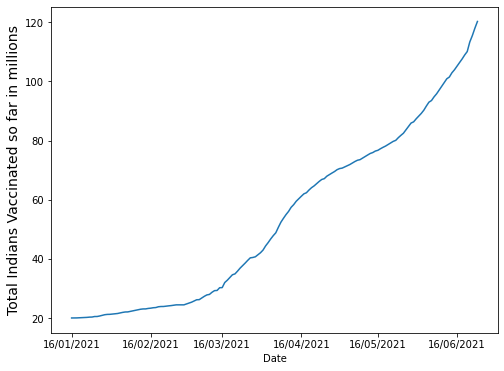

In [22]:
fig, ax = plt.subplots(figsize=(8,6))

sns.lineplot(data=CovidVaccine[CovidVaccine['State']=='India'], x='Date', y='TotalVaccinated', ax=ax)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.set_ylabel('Total Indians Vaccinated so far in millions', fontsize=14)
ax.set_yticklabels([0,20,40,60,80,100,120])

Xstart, Xend = ax.get_xlim()

plt.show()

 We can notice from the above plot that the count of vaccinated individuals is rapidly increasing and around 120 million individuals have already been vaccinated till the recorded date

### Importing CSV with Statewise Population

In [23]:
StatePop = pd.read_csv('State-Population.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'State-Population.csv'

In [ ]:
StatePop = StatePop.drop(['Population-Remove'], axis = 1)

In [ ]:
StatePop

,State,Population
0,Andaman and Nicobar Islands,381000
1,Andhra Pradesh,54681000
2,Arunachal Pradesh,1384000
3,Assam,31206000
4,Bihar,104099000
5,Chandigarh,1055000
6,Chhattisgarh,25545000
7,Dadra and Nagar Haveli and Daman and Diu,587000
8,Delhi,16788000
9,Goa,1459000


### Getting a list of  top 5 worst hit states in India

In [ ]:
latest_date = max(CovidVaccine['Date'])
LatestDate = Covid19ToDate.reset_index().Date[0]
Covid19ToDate = Covid19ToDate[Covid19ToDate['Date'] == LatestDate].sort_values(by='Confirmed', ascending=False)
CovidWorstStates = Covid19ToDate.head(5)
CovidStates = list(CovidWorstStates.State.head(5))
CovidStates

['Maharashtra', 'Kerala', 'Karnataka', 'Tamil Nadu', 'Andhra Pradesh']

### Creating a dataframe with statistics pertaining to each individual state

In [ ]:
#VaccineLatest = CovidVaccine[CovidVaccine['Date'] == latest_date]
StateVaccineLatest = CovidVaccine[(CovidVaccine['State'] != 'India') & (CovidVaccine['Date']==latest_date)]
StateVaccineLatest = pd.merge(StateVaccineLatest, StatePop, on ='State')

In [ ]:
StateVaccineLatest


,Date,State,Total Doses Administered,Sessions,Sites,FirstDose,SecondDose,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male,Female,Transgender,TotalVaccinated,Population
0,31/05/2021,Andaman and Nicobar Islands,124268.0,1670.0,13.0,109087.0,15181.0,58809.0,50269.0,9.0,...,NaN,NaN,17959.0,60483.0,30642.0,NaN,NaN,NaN,109087.0,381000
1,31/05/2021,Andhra Pradesh,9868747.0,523404.0,1019.0,7356423.0,2512324.0,3757692.0,3597643.0,1088.0,...,NaN,NaN,1099313.0,3715663.0,2539984.0,NaN,NaN,NaN,7356423.0,54681000
2,31/05/2021,Arunachal Pradesh,334007.0,11630.0,77.0,255678.0,78329.0,142969.0,112616.0,93.0,...,NaN,NaN,90094.0,119075.0,46470.0,NaN,NaN,NaN,255678.0,1384000
3,31/05/2021,Assam,4137653.0,141250.0,933.0,3304493.0,833160.0,1793541.0,1510430.0,522.0,...,NaN,NaN,948306.0,1534706.0,821156.0,NaN,NaN,NaN,3304493.0,31206000
4,31/05/2021,Bihar,10307600.0,593794.0,2052.0,8516097.0,1791503.0,4667304.0,3847222.0,1571.0,...,NaN,NaN,2281461.0,2970872.0,3261439.0,NaN,NaN,NaN,8516097.0,104099000
5,31/05/2021,Chandigarh,349507.0,17087.0,80.0,274606.0,74901.0,154057.0,120512.0,37.0,...,NaN,NaN,78380.0,119440.0,76701.0,NaN,NaN,NaN,274606.0,1055000
6,31/05/2021,Chhattisgarh,6240528.0,337893.0,1815.0,5134658.0,1105870.0,2510498.0,2623589.0,571.0,...,NaN,NaN,463343.0,2923024.0,1747945.0,NaN,NaN,NaN,5134658.0,25545000
7,31/05/2021,Dadra and Nagar Haveli and Daman and Diu,196079.0,15320.0,66.0,170105.0,25974.0,107652.0,62425.0,28.0,...,NaN,NaN,95810.0,53646.0,20580.0,NaN,NaN,NaN,170105.0,587000
8,31/05/2021,Delhi,5419341.0,152151.0,833.0,4194986.0,1224355.0,2429400.0,1764775.0,811.0,...,NaN,NaN,1529064.0,1644082.0,1019286.0,NaN,NaN,NaN,4194986.0,16788000
9,31/05/2021,Goa,528955.0,22613.0,59.0,433855.0,95100.0,222586.0,211234.0,35.0,...,NaN,NaN,100973.0,183436.0,149407.0,NaN,NaN,NaN,433855.0,1459000


## Top 10 most vaccinated states and the top 5 worst affected states

[Text(0, 0, 'Kerala'),
 Text(1, 0, 'Karnataka'),
 Text(2, 0, 'Maharashtra'),
 Text(3, 0, 'Andhra Pradesh'),
 Text(4, 0, 'Tamil Nadu')]

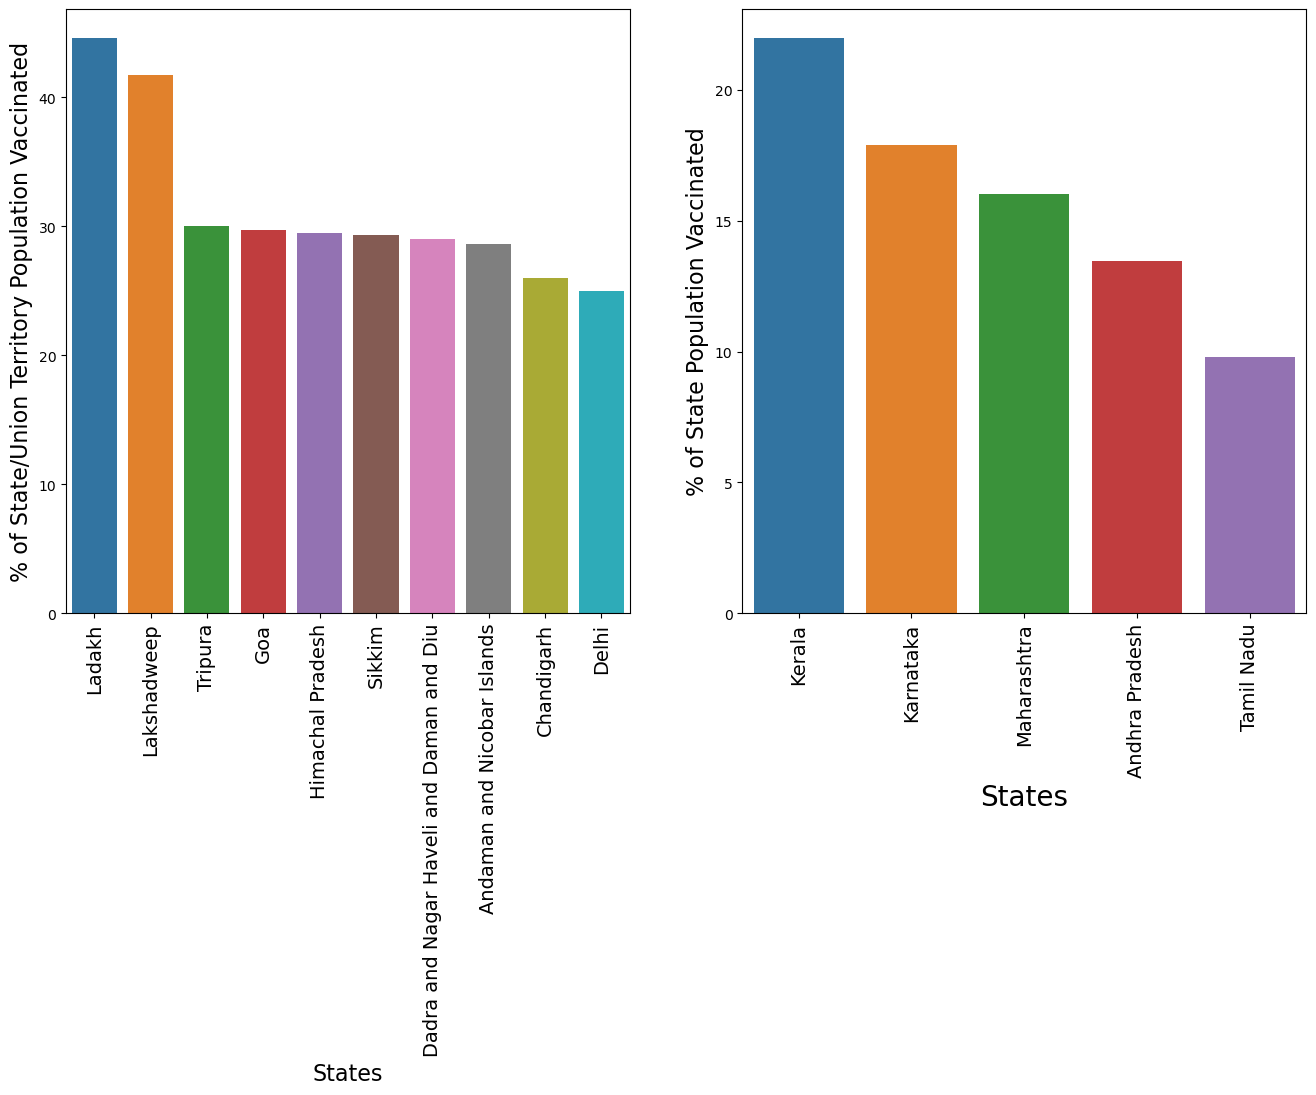

In [ ]:
      
fig, ax = plt.subplots(ncols=2, nrows=1, dpi=100, figsize=(16,8))

StateVaccineLatest['PopVacc']=(StateVaccineLatest.TotalVaccinated/StateVaccineLatest.Population)*100
StateVaccineLatest = StateVaccineLatest.sort_values(by='PopVacc', ascending=False)

sns.barplot(data=StateVaccineLatest.head(10), x='State', y='PopVacc', ax=ax[0])
ax[0].set_ylabel('% of State/Union Territory Population Vaccinated', fontsize=16)
ax[0].set_xlabel('States', fontsize=16)
ax[0].set_xticklabels(StateVaccineLatest.head(10).State, rotation=90, fontsize = 14)


data = pd.DataFrame(columns=['State', 'PopVacc'])
for i in range(len(CovidStates)):
    data = data.append(StateVaccineLatest[StateVaccineLatest['State'] == CovidStates[i]][['State', 'PopVacc']]) 

sns.barplot(data=data.sort_values(by='PopVacc',ascending=False), x='State', y='PopVacc', ax=ax[1])
ax[1].set_ylabel('% of State Population Vaccinated', fontsize=16)
ax[1].set_xlabel('States', fontsize=20)
ax[1].set_xticklabels(data.sort_values(by='PopVacc',ascending=False).State, rotation=90, fontsize = 14)


 We can see that Ladakh has vaccinated over 40% of its population, followed by Lakshwadeep and Tripura. Of the 5 worst covid affected Indian States, the Southern State of Kerala has vaccinated over 20% of its population, followed by Karnataka which has vaccinated more than 15% of its population.

### Progression of Covid-19 cases in the Top 5 vaccinated states / union territories 

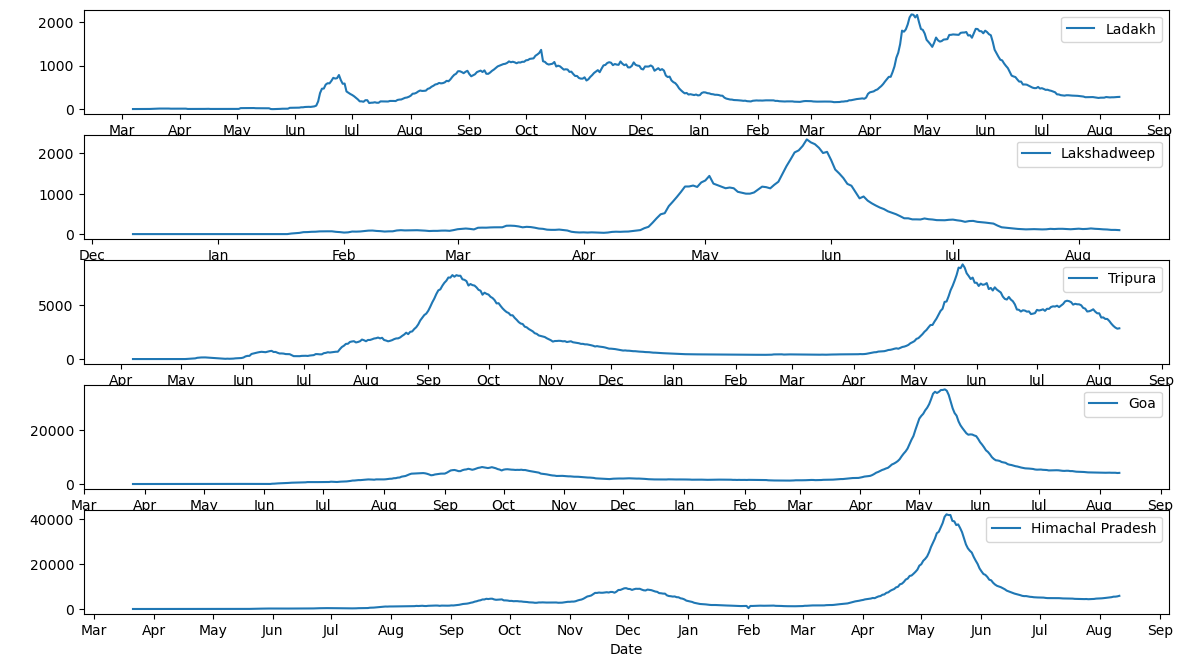

In [ ]:
StateVacc = list(StateVaccineLatest.State.head(5))
fig, ax= plt.subplots(ncols=1, nrows=5, dpi=100, figsize=(14,8))

for i in range(len(StateVacc)):
    StateVaccData = Covid19India[Covid19India['State/UnionTerritory'] == StateVacc[i]]
    sns.lineplot(data=StateVaccData, x='Date', 
                 y=(StateVaccData.Confirmed-StateVaccData.Cured),
                 ax=ax[i], label = StateVacc[i])
    ax[i].set_ylabel(" ")
    ax[i].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter('%b'))

A sharp decline could be observed from June after the second wave and also a constant decline in active cases among these states is observed.

### Pie Chart indicating Vaccination Ratio with respect to Sex

In [ ]:
import plotly
import plotly.express as px

India = CovidVaccine[(CovidVaccine['Date'] == latest_date)& (CovidVaccine['State'] == 'India')]

male = India["Male"].sum()
female = India["Female"].sum()
trans = India["Transgender"].sum()
px.pie(names=["Male Vaccinated","Female Vaccinated","Trans Gender"],values=[male,female,trans],title="Male and Female Vaccinated ratio for Covid19")

In [ ]:
India

,Date,State,Total Doses Administered,Sessions,Sites,FirstDose,SecondDose,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male,Female,Transgender,TotalVaccinated
135,31/05/2021,India,211778491.0,10623839.0,42783.0,168393525.0,43384966.0,NaN,NaN,NaN,...,NaN,NaN,NaN,36494965.0,72388059.0,59461062.0,90095606.0,78271582.0,26337.0,168393525.0


### Pie Chart indicating Vaccination Ratio with respect to the type of vaccine

In [ ]:
Covaxin = India[" Covaxin (Doses Administered)"].sum() 
Covishield = India["CoviShield (Doses Administered)"].sum()  
Sputnik = India['Sputnik V (Doses Administered)'].sum()
px.pie(names=["Covaxin Vaccinated","Covishield Vaccinated","Sputnik Vaccinated"],values=[Covaxin,Covishield,Sputnik],title="Covaxin,Covishield and Sputnik Vaccination")

### Plot denoting the total number of doses administered in each of the states with respect to the type of dose

In [ ]:

fig = go.Figure(go.Bar(x= StateVaccineLatest.State, y= StateVaccineLatest.FirstDose, name='First Dose'))
fig.add_trace(go.Bar(x=StateVaccineLatest.State, y= StateVaccineLatest.SecondDose, name='Second Dose'))
fig.add_trace(go.Bar(x=StateVaccineLatest.State, y= StateVaccineLatest['Total Doses Administered'], name='Total Doses Administered'))

fig.update_layout(barmode='stack',legend_orientation="h",legend=dict(x= 0.3, y=1.0),
                  xaxis={'categoryorder':'total descending'},
                 title_text='<b>Covid-19 Total Vaccinations in India<b>',
                  title_x=0.5,
                  width= 1100,
                  height= 1000
                 )
fig.update_xaxes(tickfont=dict(color='black', size=14))
fig.update_yaxes(tickfont=dict(color='black', size=14))
fig.show()

### Plot denoting the total number of doses administered in each of the states with respect to Gender

In [ ]:
fig = go.Figure(go.Bar(x= StateVaccineLatest.State, y= StateVaccineLatest['Male (Doses Administered)'], name='Male Individuals'))
fig.add_trace(go.Bar(x=StateVaccineLatest.State, y= StateVaccineLatest['Female (Doses Administered)'], name='Female Individuals'))
fig.add_trace(go.Bar(x=StateVaccineLatest.State, y= StateVaccineLatest['Transgender (Doses Administered)'], name='Transgender Individuals'))
fig.add_trace(go.Bar(x=StateVaccineLatest.State, y= StateVaccineLatest['Total Doses Administered'], name='Total Doses'))


fig.update_layout(barmode='stack',legend_orientation="h",legend=dict(x= 0.3, y=1.0),
                  xaxis={'categoryorder':'total descending'},
                 title_text='<b>Covid-19 Total Vaccinations in India according to Sex<b>',
                  title_x=0.5,
                  width= 1100,
                  height= 1000
                 )
fig.update_xaxes(tickfont=dict(color='black', size=14))
fig.update_yaxes(tickfont=dict(color='black', size=14))
fig.show()

### Plot denoting the total number of doses administered in each of the states with respect to the type of vaccine

In [ ]:
fig = go.Figure(go.Bar(x= StateVaccineLatest.State, y= StateVaccineLatest[' Covaxin (Doses Administered)'], name='Covaxin Administered'))
fig.add_trace(go.Bar(x=StateVaccineLatest.State, y= StateVaccineLatest[ 'CoviShield (Doses Administered)'], name='CoviShield Administered'))
fig.add_trace(go.Bar(x=StateVaccineLatest.State, y= StateVaccineLatest['Total Doses Administered'], name='Total Vaccine Administered'))


fig.update_layout(barmode='stack',legend_orientation="h",legend=dict(x= 0.3, y=1.0),
                  xaxis={'categoryorder':'total descending'},
                  title_text='<b>Covid-19 Total Vaccinations in India according to type of vaccine(as of 18 May 2021)<b>',
                  title_x=0.5,
                  width= 1100,
                  height= 1000
                 )
fig.update_xaxes(tickfont=dict(color='black', size=14))
fig.update_yaxes(tickfont=dict(color='black', size=14))
fig.show()